In [ ]:
## Notebook env: geomux (gemoux kernel)
## This notebook runs geomux to assign exactly one guide to each GEM 
## It throws out GEMs that it can't confidentally assign only one guide

In [1]:
from geomux import Geomux, read_table
import pandas as pd

In [64]:
protospacer_calls = pd.read_csv("/home/ssobti/projects/heterogeneity_brian/data/032923_MD231_CRISPRi_CRISPRa_screen/230329_A01102_0587_AH3CY5DSX7_S4_200/cellranger/combined_G12/outs/count/crispr_analysis/protospacer_calls_per_cell.csv")
protospacer_calls

cell_barcode  num_features   feature_call num_umis
0      AACGTCAGTCGAATGG-1             1       ASF1B-1i       13
1      ACAAGCTCAAGGCAAC-1             1       ASF1B-1i       26
2      ACCACAAAGTTCATGC-1             1       ASF1B-1i       15
3      AGAACAATCAGCTTCC-1             1       ASF1B-1i       17
4      AGGACTTTCACTCACC-1             1       ASF1B-1i       19
...                   ...           ...            ...      ...
10805  ACTTCGCTCTCGTCGT-2             2  VRK1-2i|NT-4i   96|299
10806  GTTCGCTTCCATCTAT-2             2  VRK1-2i|NT-4i  281|405
10807  GCACTAAGTAGCTTTG-1             2  VRK1-2i|NT-5i   77|218
10808  ATCACTTCACCGGTCA-2             2  VRK1-2i|NT-5i   57|130
10809  GATCAGTCAACAAAGT-2             2  VRK1-2i|NT-5i  418|789

[10810 rows x 4 columns]

In [65]:
protospacer_calls['feature_call'] = protospacer_calls['feature_call'].str.split('|')
protospacer_calls['num_umis'] = protospacer_calls['num_umis'].str.split('|')
protospacer_calls = protospacer_calls.explode(list(['feature_call','num_umis']))
protospacer_calls.drop(columns='num_features', inplace=True)
protospacer_calls.rename(columns={"cell_barcode": "barcode", "feature_call": "guide", "num_umis": "n_umi"}, inplace=True)
protospacer_calls

barcode     guide n_umi
0      AACGTCAGTCGAATGG-1  ASF1B-1i    13
1      ACAAGCTCAAGGCAAC-1  ASF1B-1i    26
2      ACCACAAAGTTCATGC-1  ASF1B-1i    15
3      AGAACAATCAGCTTCC-1  ASF1B-1i    17
4      AGGACTTTCACTCACC-1  ASF1B-1i    19
...                   ...       ...   ...
10807  GCACTAAGTAGCTTTG-1     NT-5i   218
10808  ATCACTTCACCGGTCA-2   VRK1-2i    57
10808  ATCACTTCACCGGTCA-2     NT-5i   130
10809  GATCAGTCAACAAAGT-2   VRK1-2i   418
10809  GATCAGTCAACAAAGT-2     NT-5i   789

[32263 rows x 3 columns]

In [66]:
gmux = Geomux(min_umi=5, n_jobs=20)

In [67]:
gmux.fit(protospacer_calls)


            Fitting Model with Params:
                min_umi: 5
                scalar: 0
                n_jobs: 20
            
Initial Size: (10810, 37)
Filtered Size: (10801, 37)

            Population Size (M): 8201065

            Number of Success States (n):
            [122767  17104 173454  42588  43227  30312  82452  16296 292739 129338
  36593  90074 159534 231651 162535 206370 525337 207425 519788 262932
 618683 111656 222653  90532 268882 376297 173197 317514 596352 347997
  91669 262341  93721 356748 270362 510679 139266]

            Number of Draws (N): 
            [ 694  116 1342 ...  395  878  651]
            
Performing Hypergeometric Tests for 10801 cells and 37 guides


In [68]:
gmux.predict(min_lor = 0.5)

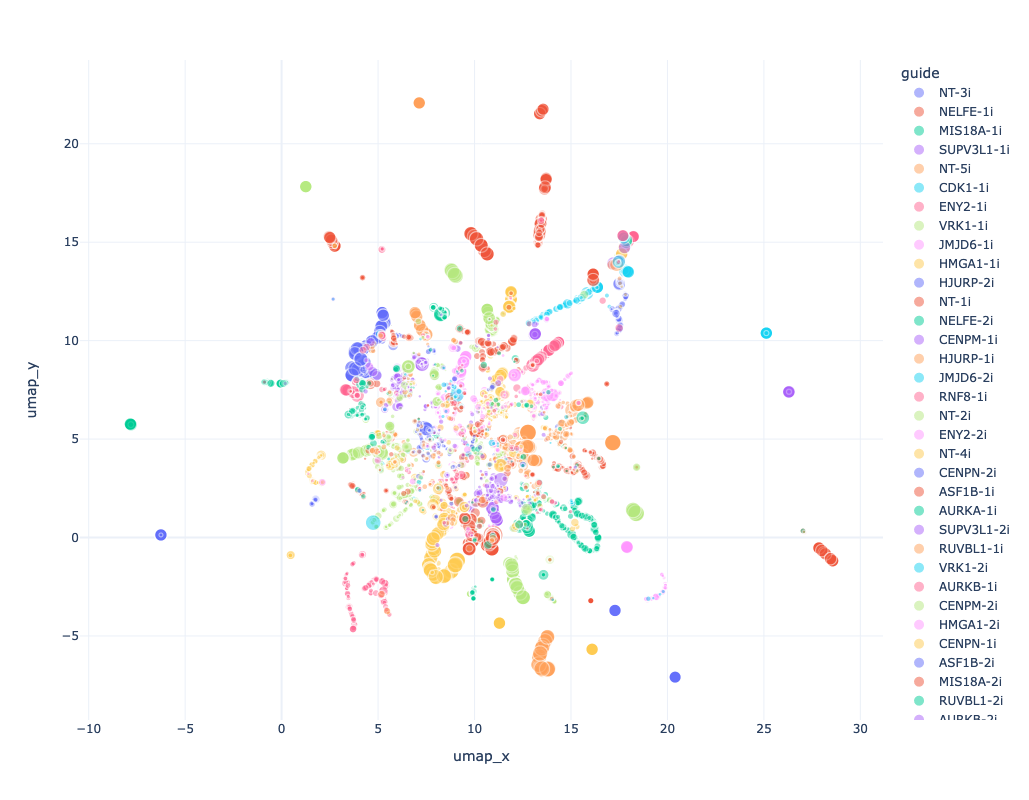

In [69]:
gmux.plot_umap()

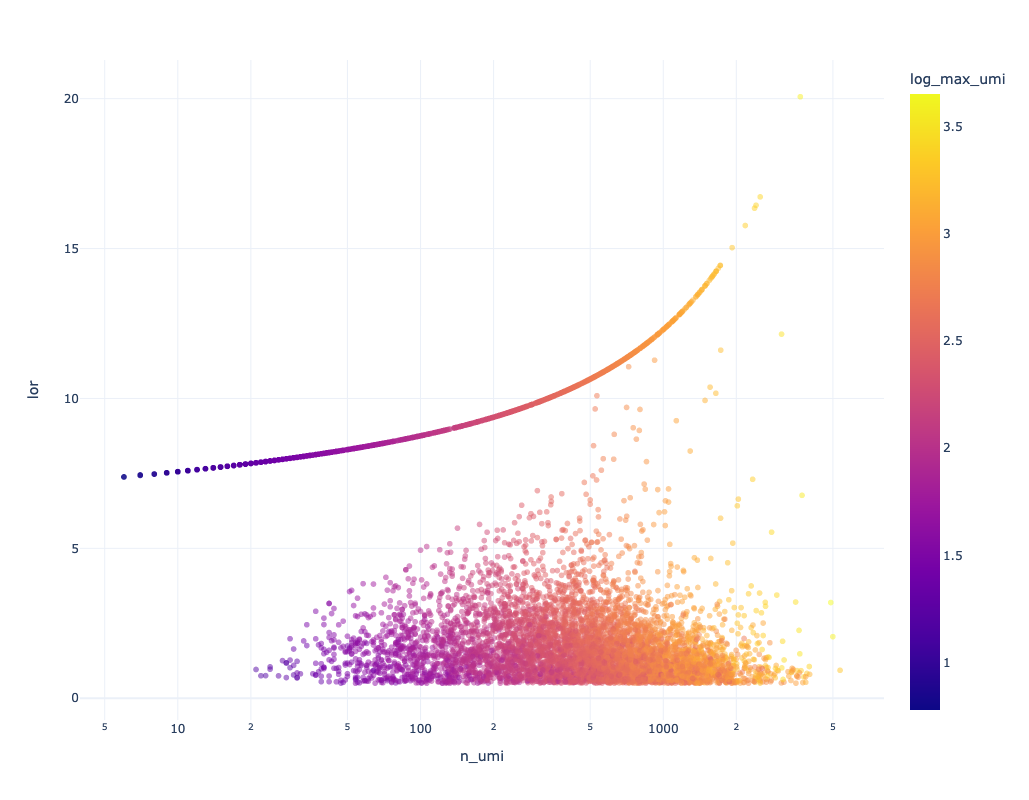

In [70]:
gmux.plot_correlation()

In [71]:
assignments_CRISPRi = gmux.assignments()
assignments_CRISPRi.head()

barcode       guide        lor         pvalue  \
barcode                                                                        
AAACCCAAGAAACTCA-1  AAACCCAAGAAACTCA-1       NT-3i  11.318039  7.065139e-322   
AAACCCAAGCTAGTTC-2  AAACCCAAGCTAGTTC-2    NELFE-1i   2.124206  2.386639e-118   
AAACCCAAGCTATCCA-2  AAACCCAAGCTATCCA-2   MIS18A-1i   2.515288  7.065139e-322   
AAACCCAAGTTCGGTT-2  AAACCCAAGTTCGGTT-2  SUPV3L1-1i   3.165643  7.065139e-322   
AAACCCACACCAGTAT-1  AAACCCACACCAGTAT-1       NT-5i   2.717025  2.513296e-305   

                       adj_pvalue  max_umi   n_umi      m_umi         v_umi  \
barcode                                                                       
AAACCCAAGAAACTCA-1  2.823491e-316    694.0   694.0  18.756757  13017.189189   
AAACCCAAGCTAGTTC-2  9.537893e-113     90.0   116.0   3.135135    233.675676   
AAACCCAAGCTATCCA-2  2.823491e-316   1224.0  1342.0  36.270270  40650.702703   
AAACCCAAGTTCGGTT-2  2.823491e-316    493.0   697.0  18.837838   6794.806306   
AAACCCACACCAGTAT-1  1.004406e-299    429.0   681.0  18.405405   5233.969970   

                    log_max_umi  log_n_umi  log_m_umi     umap_x    umap_y  
barcode                                                                     
AAACCCAAGAAACTCA-1     2.841359   2.841359   1.273158   4.410976  8.453616  
AAACCCAAGCTAGTTC-2     1.954243   2.064458   0.496256   4.241770  2.081733  
AAACCCAAGCTATCCA-2     3.087781   3.127753   1.559551  14.347571  0.799145  
AAACCCAAGTTCGGTT-2     2.692847   2.843233   1.275031   8.931170  2.496898  
AAACCCACACCAGTAT-1     2.632457   2.833147   1.264945  10.465897  4.135030

In [73]:
import pickle
import shelve
filenm = '/home/ssobti/projects/heterogeneity_brian/output_data/CRISPRi_CRISPRa_cell_culture_screen/geomux_output_assignments_CRISPRi.out'
my_shelf = shelve.open(filenm,'n') # 'n' for new
vec = ['assignments_CRISPRi'] ## put objects you want to save in quotes separated by commas
for key in vec:
    try:
        my_shelf[key] = globals()[key]
    except TypeError:
        #
        # __builtins__, my_shelf, and imported modules can not be shelved.
        #
        print('ERROR shelving: {0}'.format(key))
    except pickle.PicklingError:
        print('ERROR shelving: {0}'.format(key))
    except KeyError:
        print('ERROR shelving: {0}'.format(key))
my_shelf.close()